# VIDUSHI BHARDWAJ

# DATA SCIENCE AND BUSINESS ANALYTICS INTERN

# THE SPARKS FOUNDATION

# Task 1 : Prediction using Supervised Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
## data is read
data=pd.read_csv(r"C:\Users\Vidushi bhardwaj\Desktop\TSF\TASK1\task1.csv")

In [4]:
data.head()

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
## shape of the dataset
data.shape

(25, 2)

In [6]:
data.describe()

,hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
## number of null values in the dataset
data.isnull().sum()

hours     0
scores    0
dtype: int64

In [8]:
## columns in the dataset
data.columns

Index(['hours', 'scores'], dtype='object')

# Data Visualization

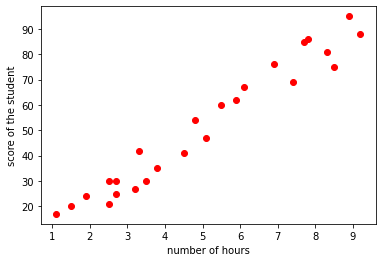

In [9]:
## scatter plot of hours vs scores
x=data['hours']
y=data['scores']
plt.plot(x,y,'ro')
plt.xlabel("number of hours")
plt.ylabel("score of the student")
plt.show()

<AxesSubplot:>

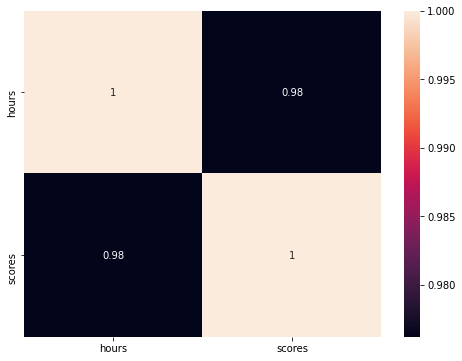

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data=data.corr(method="pearson"),annot=True)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
x = data['hours'].values.reshape(-1,1)
y = data['scores'].values

# Preparing the data

In [13]:
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [14]:
## splitting of dataset into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


# Training the Algorithm

In [16]:
## model is fitted with training data
LinearRegressor=LinearRegression()
LinearRegressor.fit(x_train,y_train)
y_predixt=LinearRegressor.predict(x_train)
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [17]:
## B0-intercept,B1-slope for the curve Y=B1*X+B0
print('B0=',regressor.intercept_,'\nB1=',regressor.coef_)

B0= 2.0181600414346974 
B1= [9.91065648]


In [18]:
## curve
Y0=regressor.intercept_+regressor.coef_*x_train

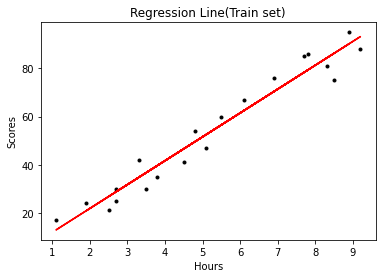

In [19]:
## plotting the predicted curve for the training data
plt.scatter(x_train,y_train,color='black',marker='.')
plt.plot(x_train,Y0,color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line(Train set)')
plt.show()

# Accuracy of the model

In [20]:
## Accuracy of the model 
print('Accuracy of training set: '+str(regressor.score(x_train,y_train)*100))
print('Accuracy of testing set: '+str(regressor.score(x_test,y_test)*100))

Accuracy of training set: 95.15510725211553
Accuracy of testing set: 94.54906892105355


# Making predictions for test data

In [21]:
## predicted values for the testing data
y_predict=regressor.predict(x_test)
print (y_predict)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [22]:
print(y_test)

[20 27 69 30 62]


In [23]:
## comparison between actual and predicted data
Data=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
Data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


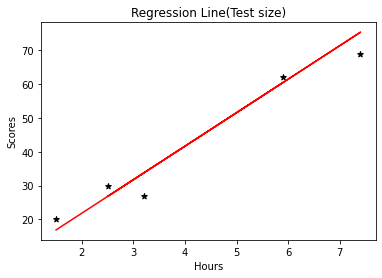

In [24]:
## plotting the predicted curve for the testing data
plt.plot(x_test,y_predict,color='red')
plt.scatter(x_test,y_test,color='black',marker='*')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line(Test size)')
plt.show()

# Goodness of Fit test

In [25]:
from sklearn import metrics
metrics.r2_score(y_test,y_predict) ## Goodness of fit test

0.9454906892105355

In [26]:
## mean squared error
mse=metrics.mean_squared_error(y_test,y_predict)
mse 

21.598769307217406

# PREDICTING THE SCORE

In [27]:
## prediction the score for 9.25 hours
Prediction_score=regressor.predict([[9.25]])
print('If a student studies for 9.25 hours/day , the predicted score is: '+str(Prediction_score))

If a student studies for 9.25 hours/day , the predicted score is: [93.69173249]
